In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Problem 1) (10pts)  Using the notes as a model, study the effect of increasing $\epsilon$ for the equation 

$$
\dot{x} = x(1-x^{2}) + \epsilon \sin(t), ~ x(0) = \tilde{x}_{0}
$$

This work should include:

a) A regular perturbation approximation of the form $x(t) = x_{0}(t) + \epsilon x_{1}(t) + \mathcal{O}(\epsilon^{2})$.  Note, feel free to use a symbolic solver to find the integral necessary to compute $x_{1}(t)$.

b) Numerical simulations used to compare to your approximate solutions.

c) An exploration of different choices of the initial condition $\tilde{x}_{0}$ and how this impacts the long time limit of your solutions.

d) A rough idea of what value of $\epsilon$ causes your perturbation expansion to break down.  Provide justification through numerical simulation.  

**Solution for Part a**

Using a regular perturbation of the given form yields

$$
\dot x = (x_{0}+\epsilon x_{1})(1-(x_{0}+\epsilon x_{1})^{2})+\epsilon\sin(t) + \mathcal{O}(\epsilon^{2}),
$$

where $0< \epsilon<<1$.

After matching powers of $\epsilon$, we have

\begin{align}
\dot x_{0}=x_{0}(1-x_{0})^{2}\\
\dot x_{1}=x_{1}(1-3x_{0}^{2})+\sin(t).
\end{align}

Let us solve $\dot x_{0}=x_{0}(1-x_{0})^{2}$ to find our $x_{0}$.

We have

$$
\int\frac{1}{x_{0}(1-x_{0})^{2}}dx_{0}=t+c
$$

So to solve $\int\frac{1}{x_{0}(1-x_{0})^{2}}dx_{0}$ we rewrite it as

$$
\int\frac{1}{x_{0}(1-x_{0})(1+x_{0})}
$$

and then use a partial fractions decomposition, which yields

\begin{align}
\int\left(\frac{1}{x_{0}}-\frac{1}{2(x_{0}-1)}-\frac{1}{2(x_{0}+1)}\right)dx_{0}\\
= \ln|x_{0}|-\frac{1}{2}|x_{0}-1|-\frac{1}{2}|x_{0}+1|
\end{align}

Thus

$$
\Rightarrow \ln \left| \frac{x_{0}}{\sqrt{x_{0} + 1}\sqrt{x_{0} - 1}} \right| = t+ c \\
\Rightarrow \frac{x_{0}}{\sqrt{x_{0} + 1}\sqrt{x_{0} - 1}} = c_{1}e^{t} \\
\Rightarrow \frac{x_{0}^{2}}{(x_{0}^{2} - 1)} = c_{2}e^{2t} \\
\Rightarrow x_{0}^{2} = c_{2}e^{2t}x_{0}^{2} - c_{2}e^{2t} \\
\Rightarrow x_{0} = \pm \sqrt{\frac{-c_{2}e^{2t}}{1-c_{2}e^{2t}}}.
$$

Now using the given initial condition $x_{0}(0)=\tilde{x_{0}}$ we get

$$
x_{0} = \pm \frac{\tilde{x}_{0}}{\sqrt{-\tilde{x}_{0}^{2}e^{-2t} + \tilde{x}_{0}^{2}e^{2t}}}.
$$

We then plug this value in our expression for $x_{1}$

$$
\dot{x}_{1} = x_{1}(1 - 3x_{0}^{2})+sin(t) \\
\Rightarrow \dot{x}_{1} + x_{1}(-1 + 3x_{0}^{2})= sin(t) \\
\Rightarrow \dot{x}_{1} + \left(-1 + \left(\pm \frac{\tilde{x}_{0}}{\sqrt{-\tilde{x}_{0}^{2}e^{-2t} + \tilde{x}_{0}^{2}e^{2t}}}\right)^{2}\right)x_{1}= sin(t)
$$

where $p(t) = \left(-1 + \left(\pm \frac{\tilde{x}_{0}}{\sqrt{-\tilde{x}_{0}^{2}e^{-2t} + \tilde{x}_{0}^{2}e^{2t}}}\right)^{2}\right)$. A symbolic solver yields the following integrating factor $G(t) = {{\rm e}^{3\,{\frac {{\tilde{x}_{0}}^{2}t}{-{\tilde{x}_{0}}^{2}{{\rm e}^{-2\,t}}+{\tilde{x}_{0}}^{2}+{{\rm e}^{-2\,t}}}}-t}}
$ 

which we can then use to solve:

$$
x_{1}(t) = G(t)\int_{0}^{t}\frac{sin(s)}{G(s)}ds = -{{\rm e}^{3\,{\frac {{c}^{2}t}{-{c}^{2}{{\rm e}^{-2\,t}}+{c}^{2}+{
{\rm e}^{-2\,t}}}}-t}}{{\rm e}^{-{\frac {t \left( 2\,{c}^{2}{{\rm e}^{
2\,t}}+{c}^{2}-1 \right) }{{c}^{2}{{\rm e}^{2\,t}}-{c}^{2}+1}}}}
 \left( \cos \left( t \right) -1 \right).
$$

Now, given this solution for $x_{1}$ we approximate our $x(t)$ as

$$
x(t) \approx x_{0} + \epsilon x_{1}
$$

from where we get


$$
x(t) \approx \left(\pm \frac{\tilde{x}_{0}}{\sqrt{-\tilde{x}_{0}^{2}e^{-2t} + \tilde{x}_{0}^{2}e^{2t}}}\right) + \epsilon \left(-{{\rm e}^{3\,{\frac {{c}^{2}t}{-{c}^{2}{{\rm e}^{-2\,t}}+{c}^{2}+{
{\rm e}^{-2\,t}}}}-t}}{{\rm e}^{-{\frac {t \left( 2\,{c}^{2}{{\rm e}^{
2\,t}}+{c}^{2}-1 \right) }{{c}^{2}{{\rm e}^{2\,t}}-{c}^{2}+1}}}}
 \left( \cos \left( t \right) -1 \right)\right).
$$

Since, quite frankly, it is difficult to visualize the behavior of this solution, we plot it for different values of $\epsilon$ and different initial conditions, in order to investigate the impact that the forcing $\sin(t)$ and that different choices of $\epsilon$ and initial conditions have on the behavior of the solution. We derive the solution numerically using $4^{th}$ order Runge-Kutta.

**Solution for Part b,c,d**

First, let us display the solution of a similar ODE, but without any $\epsilon$.

In [74]:
def f(x,t):
    return x*(1.-x**2) + np.sin(t)

def rk4(f,xj,tj,dt):
    k1 = f(xj,tj)
    k2 = f(xj+dt*k1/2,tj+dt/2)
    k3 = f(xj+dt*k2/2,tj+dt/2)
    k4 = f(xj+dt*k3,tj+dt)
    return xj + (dt/6)*(k1+2*k2+2*k3+k4)

def ode_solver(f,x0,tf,dt):
    # This program solves the ode dx/dt = f(x,t) for x(0) = x0
    # for 0<= t <= tf with time step dt.  
    
    nstep = int(np.round(tf/dt))
    sol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    sol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='k',ls='-')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')

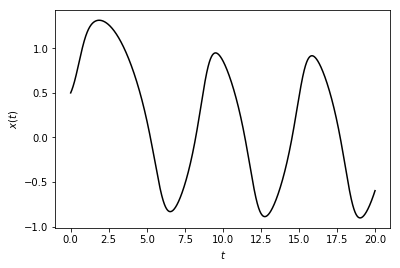

In [75]:
ode_solver(f,.5,20.,1e-4)

Now let us see what happens when we plug the $\epsilon$ and let us plot its impact for different values. 

In [79]:
def fep(x,t,ep):
    return x*(1.-x**2) + ep*np.sin(t)

def rk4ep(f,xj,tj,dt,ep):
    k1 = f(xj,tj,ep)
    k2 = f(xj+dt*k1/2,tj+dt/2,ep)
    k3 = f(xj+dt*k2/2,tj+dt/2,ep)
    k4 = f(xj+dt*k3,tj+dt,ep)
    return xj + (dt/6)*(k1+2*k2+2*k3+k4)

def tsol(xi,t,ep):
    x0 = (-xi**2 * np.exp(-2*t) + xi**2 + np.exp(-2*t))** (-0.1e1 / 0.2e1)*xi
    x1 = -np.exp(-(2*np.exp(4*xi)*xi**4 *t - 3*np.exp(2*t + 2*xi)*xi**4 - 4*np.exp(2*xi)*xi**4 *t + 3*np.exp(2*t)*xi** 4 + 4*np.exp(2*xi)*xi**2 *t + 3*np.exp(2*xi)*xi**4 + 2*xi**4 *t - 3*xi**4 - 3*xi**2 *np.exp(2*t) - 4*xi** 2 *t + 3*xi**2 + 2*t) / (xi** 2 *np.exp(2*xi) - xi**2 + 1) **2 / 2) *np.exp(-(-2*np.exp(2*xi)*xi**2 *t + 3*xi**2 *np.exp(2*t) + 2*xi**2 *t - 3*xi**2 - 2*t) / (xi**2*np.exp(2*xi) - xi**2 + 1) / 2) * (np.cos(t) - 1)
    return x0 + ep*x1

def ode_solver(f,x0,tf,dt,ep):
    
    nstep = int(np.round(tf/dt))
    numsol = np.zeros(nstep)
    anasol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    numsol[0] = x0
    anasol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        numsol[jj] = rk4ep(f,numsol[jj-1],tj,dt,ep)
        tvals[jj] = tj+dt
        anasol[jj] = tsol(x0,tvals[jj],ep)
        
    plt.plot(tvals,numsol,color='k',ls='-',label='Numerics')
    plt.plot(tvals,anasol,color='r',ls='--',label='Asymptotics')
    
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc=(.65,.1))

/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


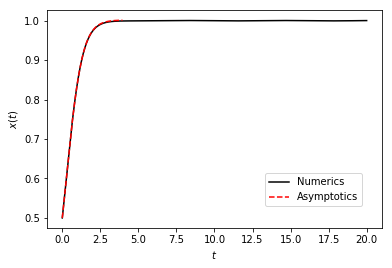

In [80]:
ode_solver(fep,.5,20,1e-4,.001)

Thus, for $\epsilon << 1$, we see that our our numerical method is reliable in terms of recreating the dynamics of the solution, even though there is probably some roundoff error that won't let our asymptotic solution go further than $t\approx4$. Now let's make $\epsilon$ ten times bigger and see what happens.

/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


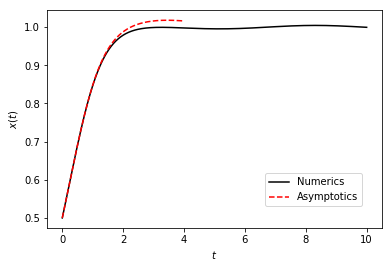

In [81]:
ode_solver(fep,.5,10,1e-4,.01)

We observe that our asympotics solution and our numerics solution start to diverge at around $t=2$. Now, let us see for what value of $\epsilon$ our perturbation solution breaks down.

/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


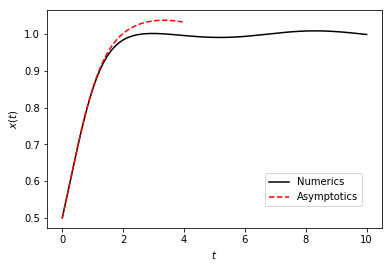

In [83]:
ode_solver(fep,.5,10,1e-4,.02)

/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


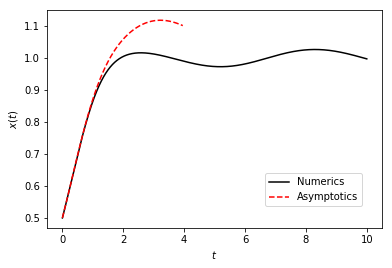

In [84]:
ode_solver(fep,.5,10,1e-4,.06)

/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


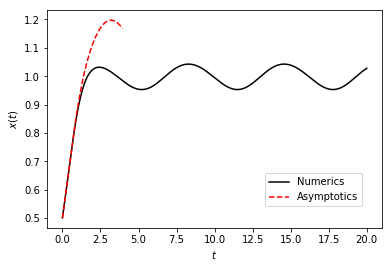

In [82]:
ode_solver(fep,.5,20,1e-4,.1)

Thus, it seems that roughly $\epsilon=0.06$ causes a pretty visible breakdown and, once we go all the way up to $0.1$, our perturbation expansion and our numerical solution are far apart in their description of the dynamics of the system.

Now we can plug in different initial conditions and study their impact on the dynamics of the solution.

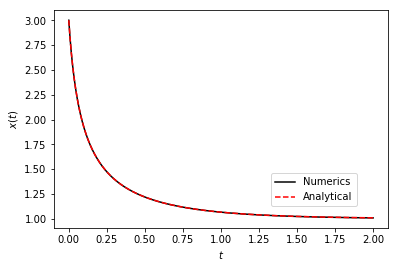

In [21]:
ode_solver(fep,3,2,1e-4,.001) #changing x0 keeping the best value of epsilon

So for $x(0)>>1$, we have an exponential decay and the solution tends asymptotically to $x(t)=1$.

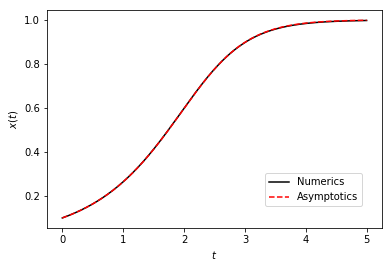

In [87]:
ode_solver(fep,0.1,5,1e-4,.001) #changing x0

For $x(0)<<1$, but greater than $0$, we see that the solution tends sigmoidally towards $x=1$, indicating that $x_{\ast}=1$ is a stable fixed point. Also, as expected, for the given value of $\epsilon$, we have a great description of the dynamics.

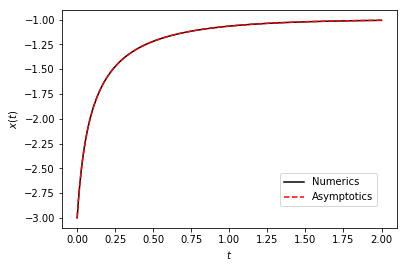

In [86]:
ode_solver(fep,-3,2,1e-4,.001) #changing x0

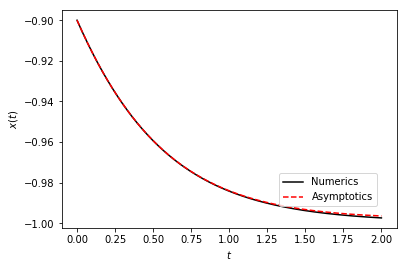

In [100]:
ode_solver(fep,-0.9,2,1e-4,.001) #changing x0

Thus, for negative initial conditions, which may or may not make physical sense based on the system that we are studying, we see that for $x(0)<<0$, solutions grow exponentially and tend asymptotically to $x=-1$, whereas negative initial conditions greater than $x=-1$ decay exponentially and tend asymptotically to $x=-1$. Therefore, $x_{\ast}=-1$ is a stable fixed point. Also, from this and the behavior for positive initial conditions, we see that $x_{\ast}=0$ is an unstable fixed point.

Now let us "play" with the initial conditions and the values of $\epsilon$.

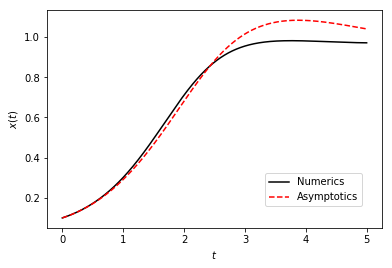

In [90]:
ode_solver(fep,0.1,5,1e-4,.06) #changing x0 and increasing epsilon to 0.06

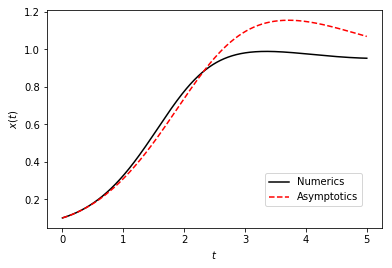

In [94]:
ode_solver(fep,0.1,5,1e-4,.1) #changing x0 and increasing epsilon to 0.1

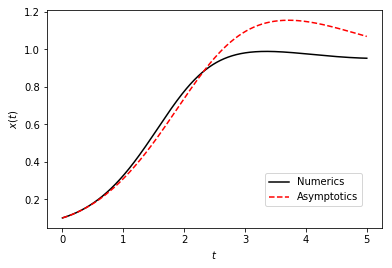

In [95]:
ode_solver(fep,0.1,5,1e-4,.1) #changing x0 and increasing epsilon to 0.1

Problem 2) (3pts each) 3.1.2, 3.2.2

/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


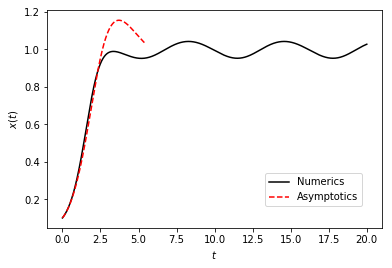

In [96]:
ode_solver(fep,0.1,20,1e-4,.1) #changing x0 and increasing epsilon to 0.1 #t=20

/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


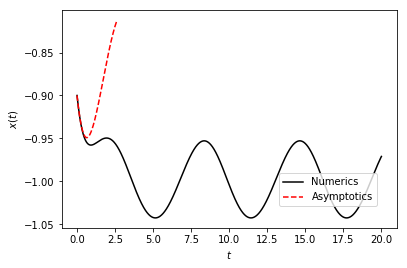

In [98]:
ode_solver(fep,-0.9,20,1e-4,.1) #negative x0 and increasing epsilon to 0.1 #t=20

Once again, we see that as $\epsilon$ gets greater, our perturbation breaks down.

Problem 2) (3pts each) 3.1.2, 3.2.2

**Solution for 3.1.2**

We have

$$
\dot x = r -\cosh(x) = f(x,r).
$$

We can find the fixed points for $f(x,r)$ by solving

$$
r-\cosh(x)=0 \longrightarrow r=\cosh(x) \longrightarrow x_{\ast}=\cosh^{-1}(r),
$$

Due to simmetry, we will also have a fixed point at $x_{\ast}=-\cosh^{-1}(r)$.

Now, to make our life easier in terms of our analysis, we Taylor-expand $\cosh(x)$ around $x=0$ and get

$$
f(x,r) \approx r-\left(1+\frac{x^{2}}{2}+\frac{x^{4}}{4!}+\mathcal{O}(x^{5})\right)
$$

From that, we readily see that $f(x,r)=0$, for $x_{\ast}=0$ and $r_{c}=1$, therefore $x_{\ast}=0$ is a fixed point and $r_{c}=1$ is our bifurcation point for the parameter $r$.

Now, we can make $\epsilon=r-1$ and we can also impose $0<\epsilon<<1$. Thus, we can drop the higher order terms of our expansion and, after plugging our $\epsilon$, work with

$$
\epsilon-\frac{x^{2}}{2}-\mathcal{O}(x^{2})=0,
$$

which holds for

$$
x_{\ast}=\pm\sqrt{2\epsilon}+\mathcal{O}(\epsilon)=\pm\sqrt{2(r-1)}+\mathcal{O}(r-1).
$$

Therefore, we see that, if $r<1$, there are no fixed points, whereas, if $r>1$ there are two fixed points, hence confirming that $r=1$, for which we have the only fixed point $x_{\ast}=0$, is our bifurcation point.

To check for what kind of bifurcation we are dealing with, we compute

$$
f_{x}(x,r)=-\sinh(x) \longrightarrow f_{x}(0,1)=0
$$

which is the tangency condition. Check.

Now

$$
f_{xx}(x,r)=-\cosh(x) \longrightarrow f_{xx}(0,1)=-1\neq0,
$$

and finally

$$
f_{r}=1\neq0.
$$

So, this is a saddle-node bifurcation. We make a phase plot for different values of the bifurcation point $r$ to check our results.

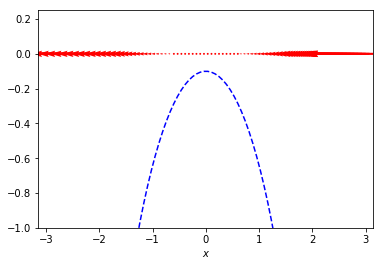

In [2]:
#vector field for 3.1.2
Pi=np.pi
r=0.9 #bifurcation point r<1
xvals = np.linspace(-Pi,Pi,90)
yvals = np.zeros(xvals.size)
xprime = r-np.cosh(xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r-np.cosh(xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');
plt.axis([-Pi,Pi,-1,0.25]);

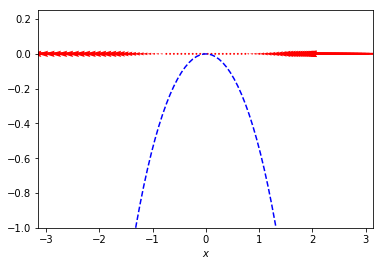

In [3]:
#vector field for 3.1.2
Pi=np.pi
r=1 #bifurcation point r=1
xvals = np.linspace(-Pi,Pi,90)
yvals = np.zeros(xvals.size)
xprime = r-np.cosh(xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r-np.cosh(xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');
plt.axis([-Pi,Pi,-1,0.25]);

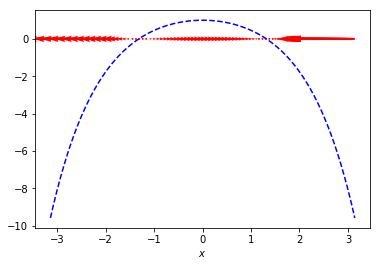

In [8]:
#vector field for 3.1.2
Pi=np.pi
r=2 #bifurcation point r>1
xvals = np.linspace(-Pi,Pi,90)
yvals = np.zeros(xvals.size)
xprime = r-np.cosh(xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r-np.cosh(xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');

Therefore, as expected from our analysis, we see that $r=1$ is indeed the bifurcation point for $f(x,r)$ and we also see that $x_{\ast}=0$ is un unstable fixed point. There are no fixed points for $r<1$, whereas there is a stable fixed point at $x_{\ast}\approx1.4$ and an unstable fixed point at $x_{\ast}\approx-1.4$ for $r>1$.

We make a bifurcation diagram to display our results.

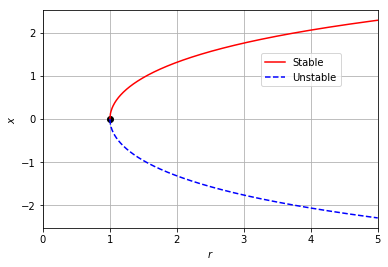

In [10]:
#bifurcation diagram
r = np.linspace(1,5,500)
xst = np.arccosh(r) #stable fp
xun = -np.arccosh(r) #unstable fp

plt.plot(1,0,'ko')
plt.plot(r,xst,color = 'r', ls = '-', label = 'Stable')
plt.plot(r,xun,color = 'b', ls = '--', label = 'Unstable')
plt.xlabel('$r$')
plt.ylabel('$x$')
plt.xlim(0,5)
plt.grid()
plt.legend(loc=(0.65,0.65))
plt.show()

**Solution for 3.2.2**

We have

$$
\dot x=rx-\ln(1+x)=f(x,r).
$$

We can readily see that at $x=0$ there is a fixed point for any value of $r$, so

$$
f(0,r)=0.
$$

Now we compute,

$$
f_{x}(x,r)=r-\frac{1}{1+x} \longrightarrow f_{x}(0,r)=r-1,
$$

which is $0$ for $r=1$. Therefore $r_{c}=1$ is our bifurcation point.

Then

$$
f_{xx}(x,r)=\frac{1}{(1+x)^{2}}\longrightarrow f_{xx}(0,1)=1\neq0.
$$

Thus, we see that there is a bifurcation of a quadratic character. Now we only have to determine if it is a saddle-node or a transcritical. Thus, we compute

$$
f_{r}(x,r)=x \longrightarrow f_{r}(0,1)=0;
$$

since $f_{r}(0,1)=0$, then we have a transcritical bifurcation. 

We can check for any other fixed point by Taylor-expanding $\ln(1+x)$ around $x=0$

$$
\ln(1+x) \approx x - \frac{x^{2}}{2} + \mathcal{O}(x^{3}).
$$

So then

$$
rx-\ln(1+x) \approx rx - x + \frac{x^{2}}{2} + \mathcal{O}(x^{3}) = 0
$$

which can readily be solved and yields the fixed point $x_{\ast}=0$ and $x_{\ast}=2-2r$.
We can display our results with the help of a vector field to check stability and then plot a bifurcation diagram.

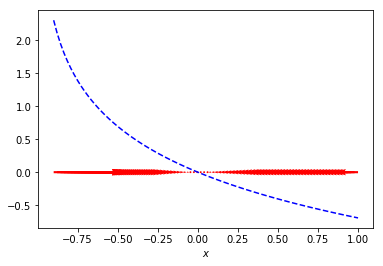

In [48]:
#vector field for 3.2.2
r=0 #bifurcation point 
xvals = np.linspace(-.9,1,90)#ln is not defined for any x <= -1
yvals = np.zeros(xvals.size)
xprime = r*xvals-np.log(1+xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r*xvals-np.log(1+xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');

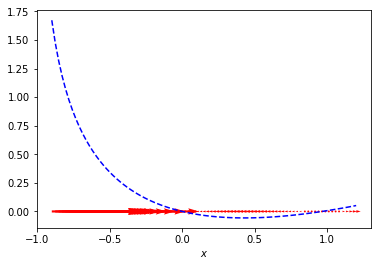

In [70]:
#vector field for 3.2.2
r=0.7 #bifurcation point
xvals = np.linspace(-.9,1.2,90)
yvals = np.zeros(xvals.size)
xprime = r*xvals-np.log(1+xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r*xvals-np.log(1+xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');

We see that for $r<1$ $x_{\ast}=0$ is a stable fixed point, whereas $x_{\ast}=2-2r$ is unstable.

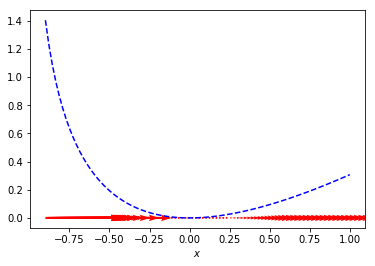

In [72]:
#vector field for 3.2.2
r=1 #bifurcation point
xvals = np.linspace(-.9,1,90)
yvals = np.zeros(xvals.size)
xprime = r*xvals-np.log(1+xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r*xvals-np.log(1+xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');

$r=1$ is clearly our bifurcation value.

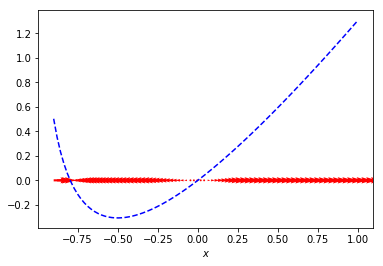

In [12]:
#vector field for 3.2.2
r=2 #bifurcation point
xvals = np.linspace(-.9,1,90)
yvals = np.zeros(xvals.size)
xprime = r*xvals-np.log(1+xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r*xvals-np.log(1+xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');

As we can see from the phase plots, we have a change in stability for the fixed point $x_{\ast}=0$ as $r$ goes from values that are less than $1$, for which we have a stable fixed point, to values that are greater than $1$, for which we have an unstable fixed point. $x_{\ast}=2-2r$ inverts its stability from unstable to stable as $r$ goes from less than $1$ to greater than $1$

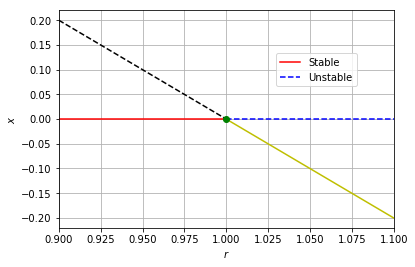

In [72]:
#bifurcation diagram
r = np.linspace(0.9,1,500)
r1 = np.linspace(1,1.1,500)
x0 = np.zeros(500)
x1 = 2-2*r
x2 = 2-2*r1

plt.plot(r,x0,color = 'r', ls = '-', label = 'Stable')
plt.plot(r1,x0,color = 'b', ls = '--', label = 'Unstable')
plt.plot(r,x1,'--k',r1,x2,'-y',1,0,'go')
plt.xlabel('$r$')
plt.ylabel('$x$')
plt.xlim(0.9,1.1)
plt.grid()
plt.legend(loc=(0.65,0.65))
plt.show()

Problem 3) (5 pts) Consider the system 
$$
\dot{X} = RX-X^2+aX^{3}+\mathcal{O}(X^{4})
$$ 
where $R\neq 0$.  We want to find a new variable $x$ such that the system transforms into $\dot{x} = Rx - x^{2} + \mathcal{O}(x^{4})$.  

To do this let
$$
x = X + bX^{3} + \mathcal{O}(X^{4})
$$
where $b$ will be chosen later to eliminate the cubic term.  This is called a _ near-identity _ transformation.  To pull this off you need to

a) Show that the near-identity transformation can be inverted to yield

$$
X = x + cx^{3} + \mathcal{O}(x^{4})
$$

where the point is to find $c$ in terms of $b$.

b) Write $\dot{x} = \dot{X} + 3bX^{2}\dot{X} + \mathcal{O}(X^{4})$, and then use your expandsion for $X$ so that everything is in terms of $x$.  How do you choose $b$ so that ultimately you have no cubic term?

**Solution for Problem 3**

So, starting with our near-identity transformation 

$$
x = X + bX^{3} + \mathcal{O}(X^{4}),
$$

we can invert it to find

$$
X = x + cx^{3} + \mathcal{O}(x^{4}).
$$

Therefore, we can plug our $X$ into our near-identity transformation

$$
X = x + cx^{3} + b(x + cx^{3})^{3} +\mathcal{O}(x^{4}).
$$

Taking a look at $(x + cx^{3})^{3}$, we notice that the only terms whose degree is less than $4$, which is where we are truncating our expansion, is $x$ which gets raised to the third power. Everything else is $4th$-degree and above. Thus, our $X$ can be rewritten as

$$
X = x  + cx^{3} + bx^{3} +\mathcal{O}(x^{4}) \longrightarrow (c+b)x^{3} +\mathcal{O}(x^{4}) = 0;
$$

Since we want to get rid to the cubic term, we impose $(c+b)=0$ and thus

$$
c=-b.
$$

We can rewrite our $X$ as

$$
X=x-bx^{3}+\mathcal{O}(x^{4}).
$$

Taking the derivative of $x$, yields

$$
\dot x = \dot X + 3bX^{2}\dot X + \mathcal{O}(X^{3}\dot X) \longrightarrow \dot x = \dot X(1+3bX^{2}+\mathcal{O}(X^{3}))
$$

Which, using our expansion for $X$, we can write in terms of $x$ as

$$
\dot x = \dot x - 3bx^{2}\dot x + \mathcal{O}(x^{3}\dot x) \longrightarrow \dot x = \dot x(1-3bx^{2}+\mathcal{O}(x^{3}))
$$

Now taking

$$
\dot{X} = RX-X^2+aX^{3}+\mathcal{O}(X^{4})
$$

we can rewrite it in terms of $x$

\begin{align}
\dot{X} = R(x-bx^{3})-x^{2} + ax^{3} + \mathcal{O}(x^{4})\\
=Rx-bRx^{3}-x^{2}+ax^{3}+\mathcal{O}(x^{4})\\
=Rx-x^{2}+(a-bR)x^{3}+\mathcal{O}(x^{4})
\end{align}

Now, from our expansion for $X$, we also have that

$$
\dot{X}=\dot x(1-3bx^{2}+\mathcal{O}(x^{3})),
$$
in terms of $x$.

Thus,

$$
\dot x(1-3bx^{2}+\mathcal{O}(x^{3})) = Rx-x^{2}+(a-bR)x^{3}+\mathcal{O}(x^{4});
$$

so now this becomes a geometric series argument for which we see

$$
\frac{1}{(1-3bx^{2}+\mathcal{O}(x^{3}))} = 1+3bx^{2}+\mathcal{O}(x^{3})
$$

and thus

\begin{align}
\dot x = (1+3bx^{2}+\mathcal{O}(x^{3}))(Rx-x^{2}+(a-bR)x^{3}+\mathcal{O}(x^{4}))\\
= Rx+3bRx^{3}-x^{2}+ax^{3}-bRx^{3}+\mathcal{O}(x^{4})\\
= Rx-x^{2}+(a-bR+3bR)x^{3}+\mathcal{O}(x^{4})\\
= Rx-x^{2}+(a+2bR)x^{3}+\mathcal{O}(x^{4}).
\end{align}

In order to get rid of the cubic term we impose

$$
(a+2bR)=0 \longrightarrow b=-\frac{a}{2R}.
$$

Thus, we are left with

$$
\dot x = Rx-x^{2}+\mathcal{O}(x^{4}).
$$

Finally, we can also rewrite our $x$ as

$$
x=X-\frac{a}{2R}X^{3}+\mathcal{O}(X^{4}).
$$

Problem 4) (5pts) Now we generalize the method from above.  Suppose we have managed to eliminate a number of higher-order terms, so that the system has been transformed into 

$$
\dot{X} = RX - X^{2} + a_{n}X^{n} + \mathcal{O}(X^{n+1}), ~ n\geq 3.
$$

Use the near-identity transformation $x = X + b_{n}X^{n} + \mathcal{O}(X^{n+1})$ and the previous strategy to show that the system can be rewritten as 

$$
\dot{x} = Rx - x^{2} + \mathcal{O}(x^{n+1})
$$

for an appropriate choice of $b_{n}$.  This shows we can eliminate as many higher-order terms as we like.

**Solution for Problem 4**

We have to generalize the previous case for $n\geq 3$.

Our near-identity transformation is

$$
x = X + b_{n}X^{n} + \mathcal{O}(X^{n+1})
$$

which we can invert to find

$$
X=x+c_{n}x^{n}+\mathcal{O}(x^{n+1})
$$

and plug it back into our $x$

$$
x=x+c_{n}x^{n}+b_{n}X^{n}+\mathcal{O}(x^{n+1}),
$$

since we are truncating all the $n+1$ terms and on. Therefore

$$
c_{n}x^{n}+b_{n}X^{n}+\mathcal{O}(x^{n+1}) = 0 \longrightarrow (c_{n}+b_{n})x^{n}=0 \longrightarrow c_{n}=-b_{n}
$$

We can rewrite our $X$ as

$$
X=x-b_{n}x^{n}+\mathcal{O}(x^{n+1}).
$$

Taking the derivative of $x$, yields

$$
\dot x = \dot X + nb_{n}X^{n-1}\dot X + \mathcal{O}(X^{n}\dot{X}) \longrightarrow \dot x = \dot X(1+nb_{n}X^{n-1}+\mathcal{O}(X^{n}))
$$

Which, using our expansion for $X$, we can write in terms of $x$ as

$$
\dot x = \dot x - nb_{n}x^{n-1}\dot x + \mathcal{O}(x^{n}\dot x) \longrightarrow \dot x = \dot x(1-nb_{n}x^{n-1}+\mathcal{O}(x^{n}))
$$

Now taking

$$
\dot{X} = RX-X^{2}+a_{n}X^{n}+\mathcal{O}(X^{n+1})
$$

we can rewrite it in terms of $x$

\begin{align}
\dot{X} = R(x-b_{n}x^{n})-x^{2} + a_{n}x^{n} + \mathcal{O}(x^{n+1})\\
=Rx-b_{n}Rx^{n}-x^{2}+a_{n}x^{n}+\mathcal{O}(x^{n+1})\\
=Rx-x^{2}+(a_{n}-b_{n}R)x^{n}+\mathcal{O}(x^{n+1})
\end{align}

Now, since, from our expansion for $X$, we also have that

$$
\dot{X}=\dot x(1-nb_{n}x^{n-1}+\mathcal{O}(x^{n})),
$$
in terms of $x$, then

$$
\dot x(1-nb_{n}x^{n-1}+\mathcal{O}(x^{n})) = Rx-x^{2}+(a_{n}-b_{n}R)x^{n}+\mathcal{O}(x^{n+1});
$$

so now this becomes a geometric series argument for which we see

$$
\frac{1}{(1-nb_{n}x^{n-1}+\mathcal{O}(x^{n}))} = 1+nb_{n}x^{n-1}+\mathcal{O}(x^{n})
$$

and thus

\begin{align}
\dot x = (1+nb_{n}x^{n-1}+\mathcal{O}(x^{n}))(Rx-x^{2}+(a_{n}-b_{n}R)x^{n}+\mathcal{O}(x^{n+1}))\\
= Rx+nb_{n}Rx^{n}-x^{2}+a_{n}x^{n}-b_{n}Rx^{n}+\mathcal{O}(x^{n+1})\\
= Rx-x^{2}+(a_{n}-b_{n}R+nb_{n}R)x^{n}+\mathcal{O}(x^{n+1}).
\end{align}

In order to get rid of the $n^{th}$ term we impose

$$
(a_{n}-b_{n}R+nb_{n}R)=0 \longrightarrow b_{n}=-\frac{a_{n}}{R(n-1)}.
$$

We see that this yields exactly the result of problem 3 for $n=3$ as in the previous case.

Thus, we are left with

$$
\dot x = Rx-x^{2}+\mathcal{O}(x^{n+1}).
$$

Finally, we can also rewrite our $x$ as

$$
x=X-\frac{a_{n}}{R(n-1)}X^{n}+\mathcal{O}(X^{n+1}).
$$